[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^UST2Y']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


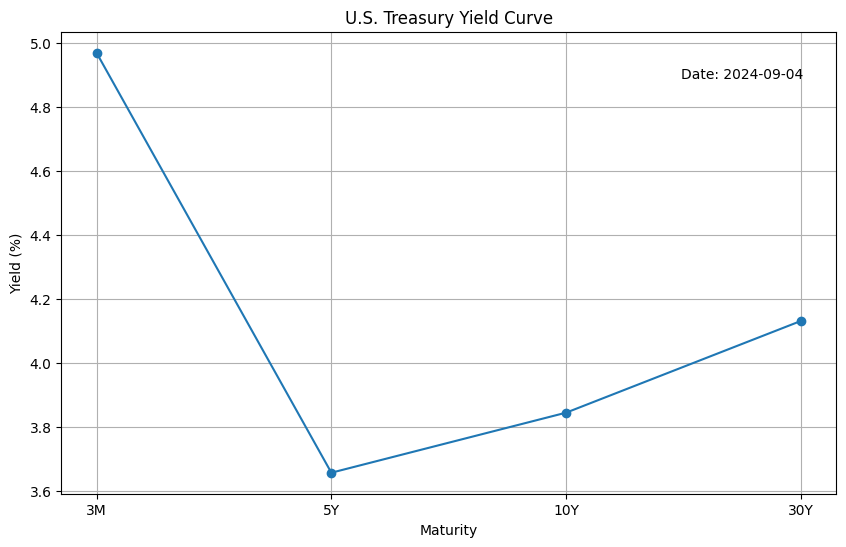

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the tickers for different U.S. Treasury yields
tickers = {
    '3M': '^IRX',
    '2Y': '^UST2Y',
    '5Y': '^FVX',
    '10Y': '^TNX',
    '30Y': '^TYX'
}

# Download the most recent data for each maturity
yields = {}
for maturity, ticker in tickers.items():
    data = yf.download(ticker, period='1d')
    if not data.empty:
        yields[maturity] = data['Adj Close'].iloc[-1]

# Sort the yields by maturity
maturities = sorted(yields.keys(), key=lambda x: int(x[:-1]))
yield_values = [yields[m] for m in maturities]

# Plotting the yield curve
plt.figure(figsize=(10, 6))
plt.plot(maturities, yield_values, marker='o', linestyle='-')
plt.title('U.S. Treasury Yield Curve')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.grid(True)

# Display the current date in the plot
plt.annotate(f'Date: {datetime.now().strftime("%Y-%m-%d")}', xy=(0.8, 0.9), xycoords='axes fraction')

plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Error fetching 2Y data from FRED: cannot convert the series to <class 'float'>


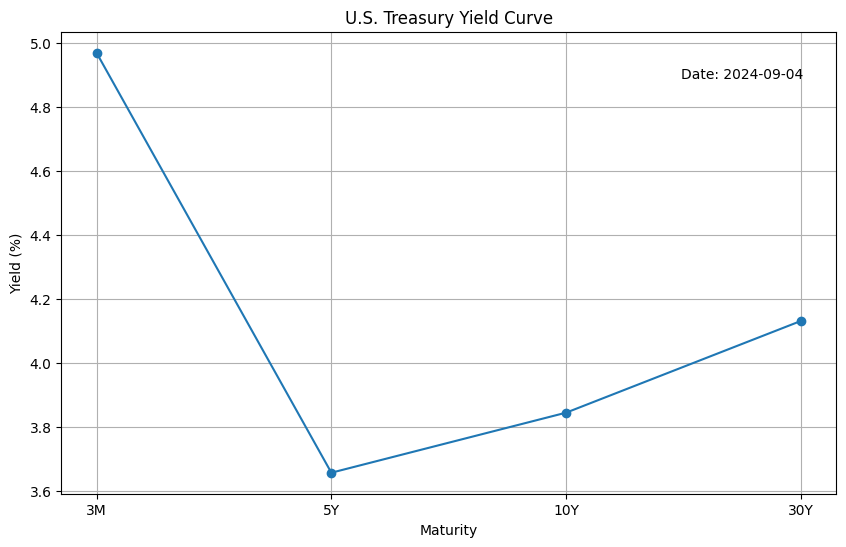

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred
from datetime import datetime

# Initialize FRED API with your API key
fred = Fred(api_key='51b9e9a160dc276b1f4ef40ad32e639b')

# Define the tickers for different U.S. Treasury yields
tickers = {
    '3M': '^IRX',
    '5Y': '^FVX',
    '10Y': '^TNX',
    '30Y': '^TYX'
}

# Initialize the yields dictionary
yields = {}

# Download the most recent data for each maturity from Yahoo Finance
for maturity, ticker in tickers.items():
    try:
        data = yf.download(ticker, period='1d')
        if not data.empty:
            # Ensure we get a valid number from Yahoo Finance
            yield_value = float(data['Adj Close'].iloc[-1])
            yields[maturity] = yield_value
        else:
            print(f"No data found for {maturity} ({ticker})")
    except Exception as e:
        print(f"Error retrieving data for {maturity} ({ticker}): {e}")

# Get the 2-year Treasury yield from FRED
try:
    yields['2Y'] = float(fred.get_series_latest_release('DGS2'))
except Exception as e:
    print(f"Error fetching 2Y data from FRED: {e}")

# Check if yields dictionary has enough data
if len(yields) < 3:
    print("Not enough data to plot the yield curve.")
else:
    # Sort the yields by maturity
    maturities = sorted(yields.keys(), key=lambda x: int(x[:-1]))
    yield_values = [yields[m] for m in maturities]

    # Ensure all values are valid floats
    if all(isinstance(y, float) for y in yield_values):
        # Plotting the yield curve
        plt.figure(figsize=(10, 6))
        plt.plot(maturities, yield_values, marker='o', linestyle='-')
        plt.title('U.S. Treasury Yield Curve')
        plt.xlabel('Maturity')
        plt.ylabel('Yield (%)')
        plt.grid(True)

        # Display the current date in the plot
        plt.annotate(f'Date: {datetime.now().strftime("%Y-%m-%d")}', xy=(0.8, 0.9), xycoords='axes fraction')

        plt.show()
    else:
        print("Error: Yield values contain non-numeric data.")


The yield curve you've shared appears to have an unusual shape that can be described as a "humped" or "inverted and then normal" yield curve:

Inverted Segment (3M to 5Y): The yield decreases sharply from the 3-month to the 5-year maturity. This inversion, where short-term rates are higher than mid-term rates, often signals market expectations of a potential economic downturn or recession.

Normal Segment (5Y to 30Y): From the 5-year to the 30-year maturity, the curve slopes upward, indicating that longer-term yields are higher than mid-term yields. This part of the curve suggests that the market expects interest rates to rise over the longer term, potentially due to future economic recovery or inflation.

Interpretation:
The initial inversion from 3 months to 5 years suggests concerns about the near-term economic outlook. The market might be pricing in lower future interest rates, which typically occurs when investors expect slower growth or a recession.
The upward slope from 5 years to 30 years indicates a return to normalcy in the long-term outlook, where the market expects economic conditions to improve or inflation to rise, leading to higher yields over longer durations.
This mixed shape is relatively rare and indicates a complex economic outlook, with short-term pessimism but longer-term optimism.